**ЛАБОРАТОРНА РОБОТА № 1**

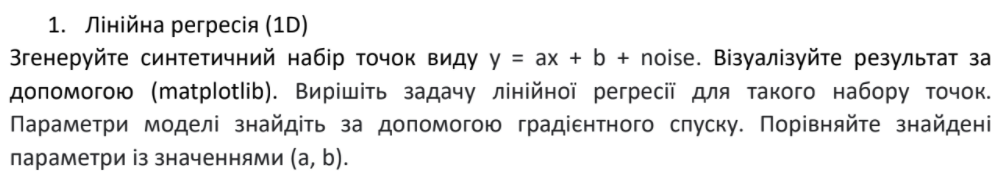

In [464]:
# Our libraries
import scipy.special
import numpy as np
import matplotlib.pyplot as plt

# Random number generation as a linear y = ax + b + noise
a = 1
b = 3
X = np.linspace(0,10, 500)
Y = a*X + b + np.random.normal(0, 1, 500)
for i in range(5):
  print("X_", i ," = ", "{:.9f}".format(X[i]))
  print("Y_", i ," = ", "{:.9f}".format(Y[i]))
  print("")

X_ 0  =  0.000000000
Y_ 0  =  2.552704364

X_ 1  =  0.020040080
Y_ 1  =  4.082667827

X_ 2  =  0.040080160
Y_ 2  =  2.901667400

X_ 3  =  0.060120240
Y_ 3  =  3.867179822

X_ 4  =  0.080160321
Y_ 4  =  3.814813666



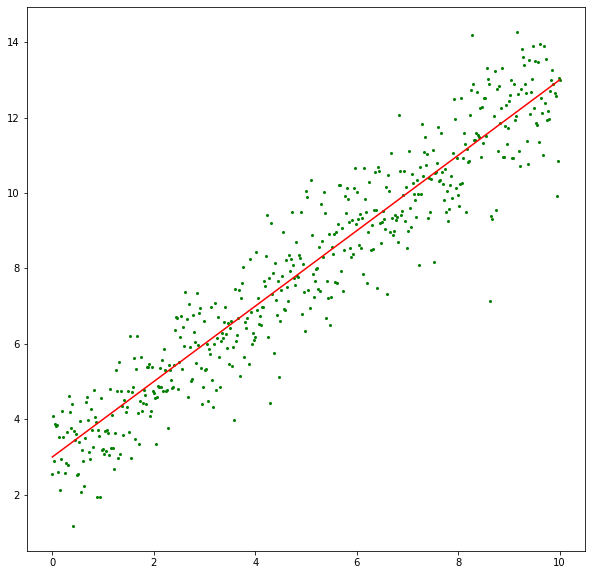

In [465]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X, Y, c='g', s=4)
plt.plot(X, a*X + b, c='r')
plt.show()

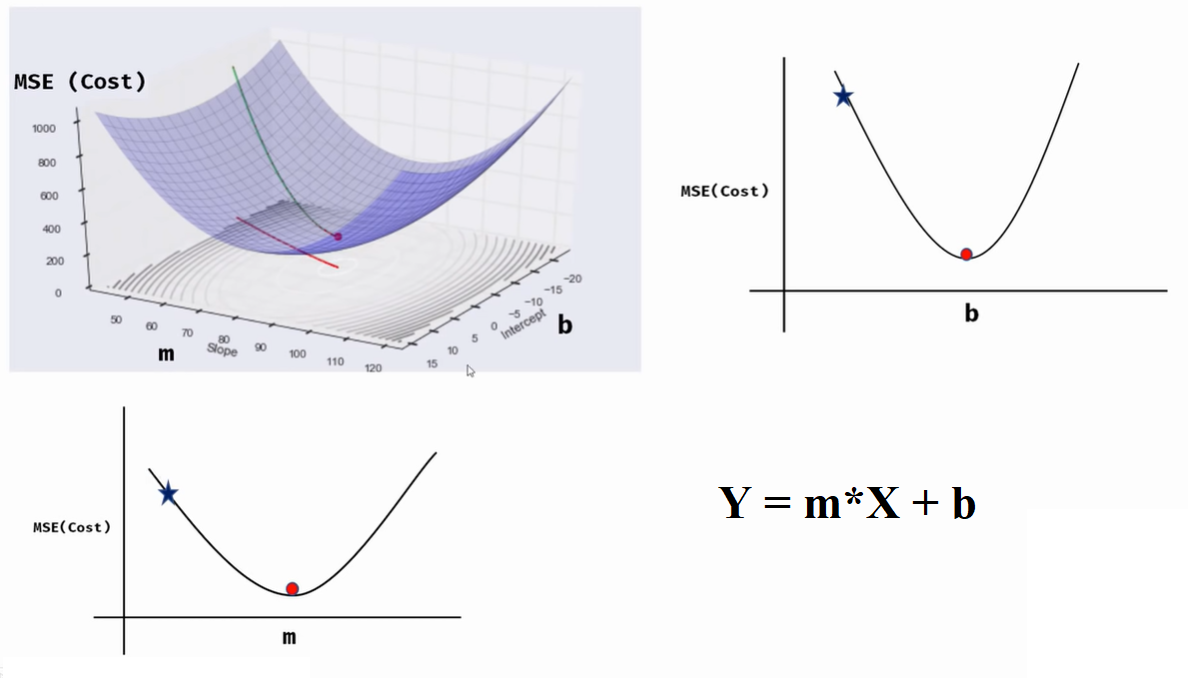

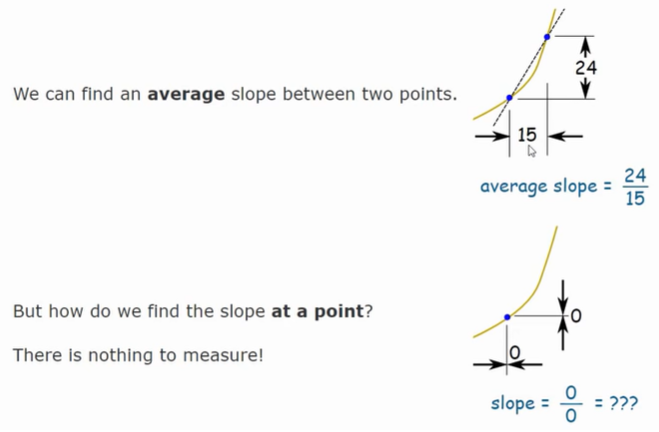

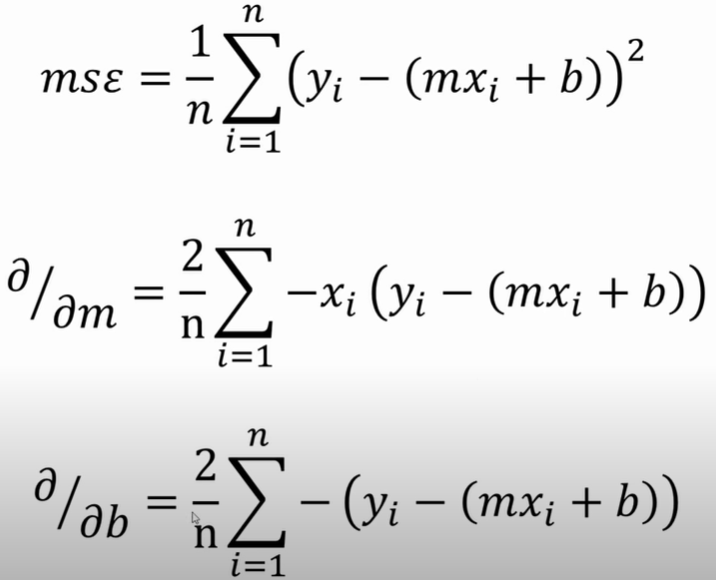

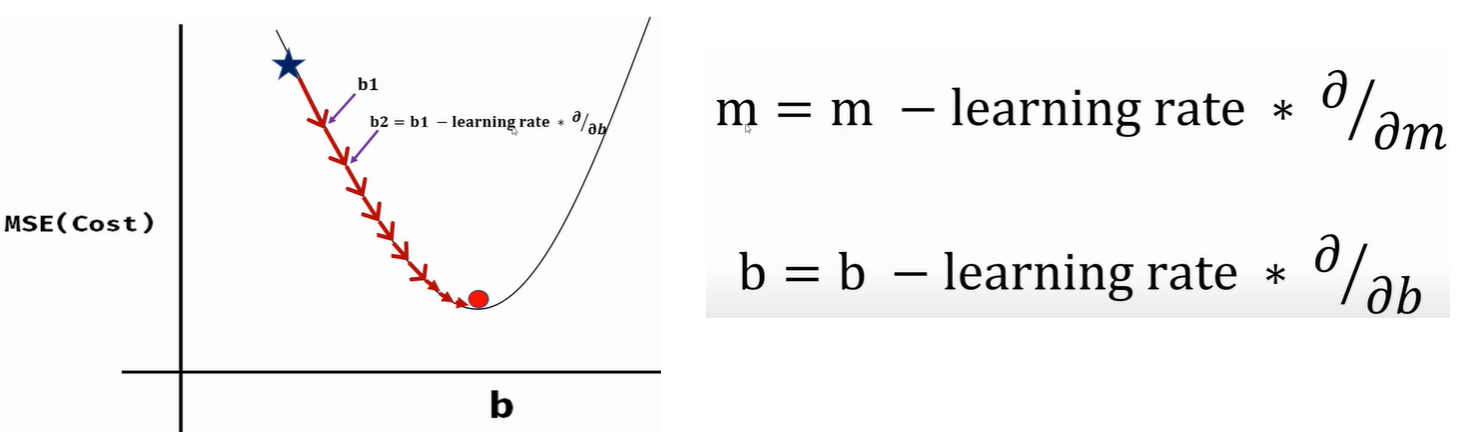

In [466]:
# Solve the linear regression problem using the gradient descent method
def gradient_descent_method(x, y):
  a_curr = b_curr = 0
  learning_rate = 0.01 # how fast the algorithm learns
  iter_num = 1200
  for i in range(iter_num):
    y_pred = a_curr*x + b_curr
    error = y - y_pred
    D_a = -(2/len(x))*sum(x*error)
    D_b = -(2/len(x))*sum(error)
    a_curr = a_curr - learning_rate*D_a
    b_curr = b_curr - learning_rate*D_b
    if (i < 5 or i > iter_num - 5):
      print("a = {:.9f}".format(a_curr) , "b = {:.9f}".format(b_curr), "iter_num = ", format(i+1))
  return a_curr, b_curr

a_curr, b_curr = gradient_descent_method(X,Y)
print("a_error =", "{:.9f}".format(a_curr - a), ";  b_error =", "{:.9f}".format(b_curr - b), ".")

a = 0.963188100 b = 0.158761818 iter_num =  1
a = 1.267731207 b = 0.218029589 iter_num =  2
a = 1.363115363 b = 0.245657694 iter_num =  3
a = 1.392083554 b = 0.263194822 iter_num =  4
a = 1.399966554 b = 0.277484388 iter_num =  5
a = 1.013335635 b = 2.869595850 iter_num =  1197
a = 1.013330149 b = 2.869632187 iter_num =  1198
a = 1.013324691 b = 2.869668346 iter_num =  1199
a = 1.013319259 b = 2.869704328 iter_num =  1200
a_error = 0.013319259 ;  b_error = -0.130295672 .


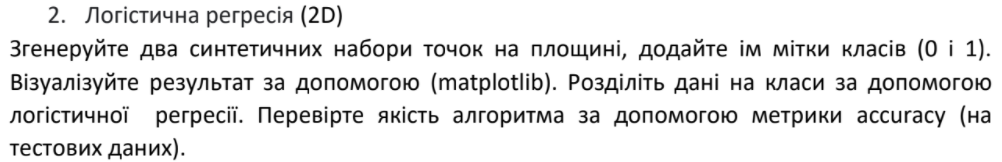

In [467]:
# Splitting data into training and test data (breakdown of data into 50% training and 50% test data)
import random
def train_test_split(X, Y):
  #train_index = int(0.5 * len(X))
  #X_train, X_test = X[:train_index], X[train_index:]
  #Y_train, Y_test = Y[:train_index], Y[train_index:]
  #return X_train, Y_train, X_test, Y_test

  train_index = int(0.5 * len(X))
  o = np.random.permutation(X.shape[0])
  # print(o)
  X_train, X_test = np.split(np.take(X,o,axis=0), [train_index])
  Y_train, Y_test = np.split(np.take(Y,o), [train_index])
  return X_train, Y_train, X_test, Y_test

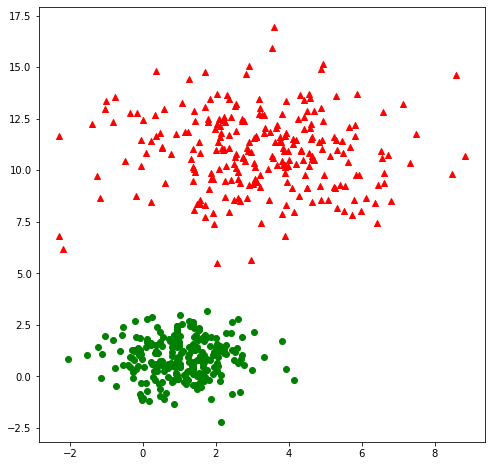

In [468]:
# Setting the expected value and variance of random variables
E_1, var_1 = [1,1], [[1,0],[0,1]]
num_points = 250
psi_1 = np.random.multivariate_normal(E_1, var_1, num_points)
E_2, var_2 = [3,11], [[4,0],[0,4]]
psi_2 = np.random.multivariate_normal(E_2, var_2, num_points)

fig = plt.figure(figsize=(8,8))
plt.scatter(psi_1[:,0], psi_1[:,1], c = "green", label=0)
plt.scatter(psi_2[:,0], psi_2[:,1], marker="^", c = "red", label=1)
plt.show()

In [469]:
# Generation of synthetic dataset for classification problem: data(x) and labels
psi = np.concatenate([psi_1, psi_2])
labels = np.array([0] * num_points + [1] *  num_points)

Psi_train, labels_train, Psi_test, labels_test = train_test_split(psi, labels)
for i in range(5):
  print("Psi_train_", i ," = ", (Psi_train[i]))

Psi_train_ 0  =  [1.70479918 2.0214781 ]
Psi_train_ 1  =  [0.3907036  1.15694359]
Psi_train_ 2  =  [ 8.82145848 10.68722148]
Psi_train_ 3  =  [-1.21760302  1.43596159]
Psi_train_ 4  =  [1.08174629 1.202727  ]


In [470]:
for i in range(5):
  print("labels_train", i ," = ", (labels_train[i]))

labels_train 0  =  0
labels_train 1  =  0
labels_train 2  =  1
labels_train 3  =  0
labels_train 4  =  0


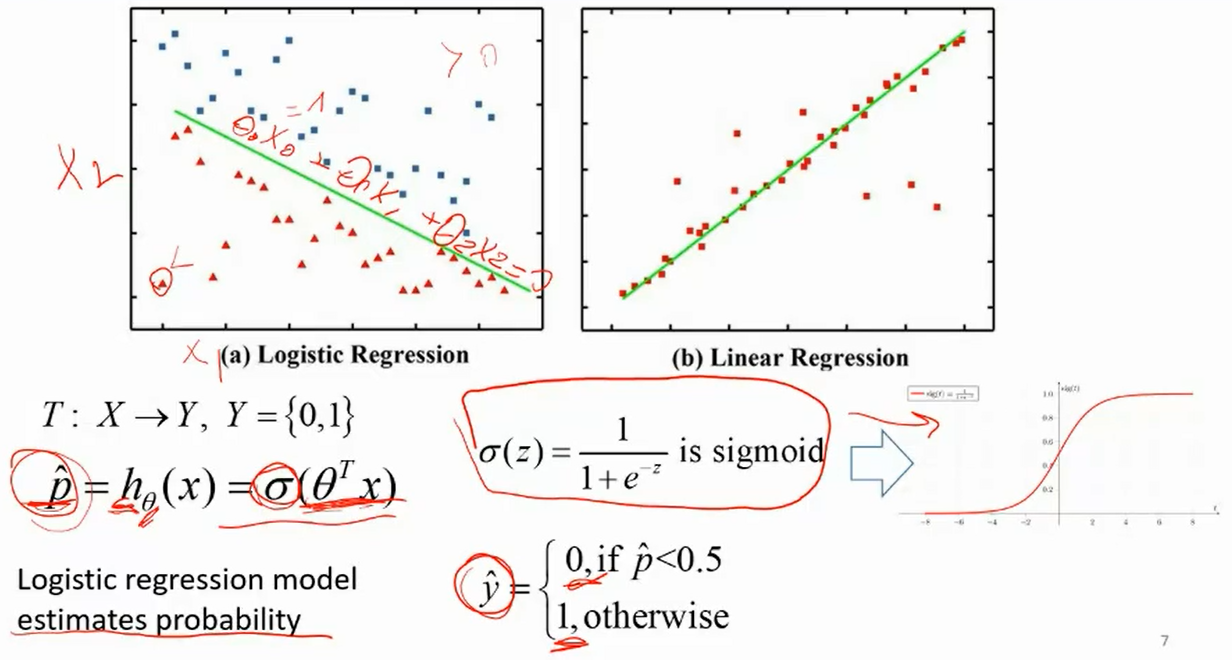

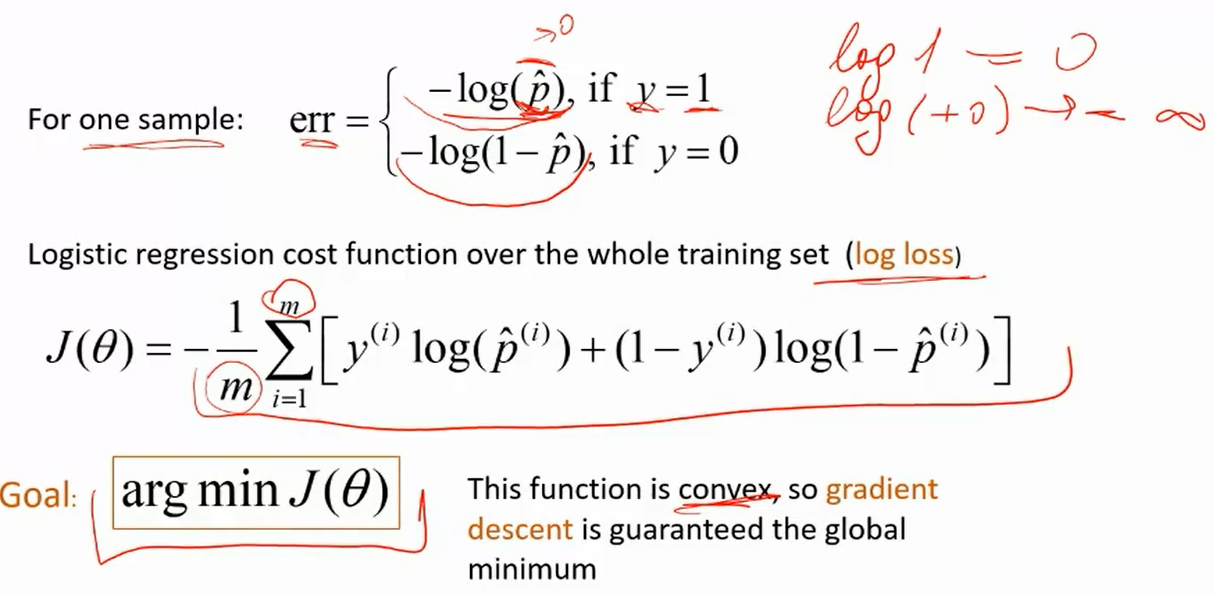

In [471]:
# Logistic Regression = Linear Classification
theta_vector = [1,1,1]

def sigmoid_func(x):
  return 1/(1+np.exp(-x))

def p_func(theta_vector, psi):
  return sigmoid_func(np.array(theta_vector[0]+theta_vector[1]*np.array(psi[:,0])+theta_vector[2]*np.array(psi[:,1])))

def log_loss_func(theta_vector, psi, labels): # it is a cost function
  p = p_func(theta_vector, psi)
  return -1*sum(labels*np.log(p)+(1-labels)*np.log(1-p))/len(psi)

def gradient_of_log_loss_func(theta_vector, psi, labels):
   p = p_func(theta_vector, psi)
   grad_res = [0]*3
   grad_res[0] = -1*sum(labels*(1-p)-(1-labels)*p)
   grad_res[1] = -1*sum(labels*(1-p)*psi[:,0]-(1-labels)*p*psi[:,0])
   grad_res[2] = -1*sum(labels*(1-p)*psi[:,1]-(1-labels)*p*psi[:,1])
   return grad_res

def gradient_descent_for_classification(theta_vector_new, theta_vector_prev, learning_rate, psi, labels):
  print(theta_vector_new)
  print(log_loss_func(theta_vector_new, psi, labels))
  for j in range(0, psi.shape[0]-1):
    theta_vector_prev = theta_vector_new
    gradient_of_log_loss_res = gradient_of_log_loss_func(theta_vector_prev, psi, labels)
    theta_vector_curr_0 = theta_vector_prev[0] - learning_rate*gradient_of_log_loss_res[0]
    theta_vector_curr_1 = theta_vector_prev[1] - learning_rate*gradient_of_log_loss_res[1]
    theta_vector_curr_2 = theta_vector_prev[2] - learning_rate*gradient_of_log_loss_res[2]
    theta_vector_new = [theta_vector_curr_0, theta_vector_curr_1, theta_vector_curr_2]
    #c = 0
    #for i in range(0,2):
     # c += (theta_vector_new[i]-theta_vector_prev[i])**2 
    #if c < pow(10,-7):
     # return theta_vector_new
  print(theta_vector_new)
  print(log_loss_func(theta_vector_new, psi, labels))
  return theta_vector_new

In [472]:
theta_vector = gradient_descent_for_classification(theta_vector, theta_vector, 0.01, Psi_train, labels_train)

[1, 1, 1]
1.5082262155840438
[-8.450157213136642, -0.40171107316528437, 1.9809702876095672]
0.0035408209544758465


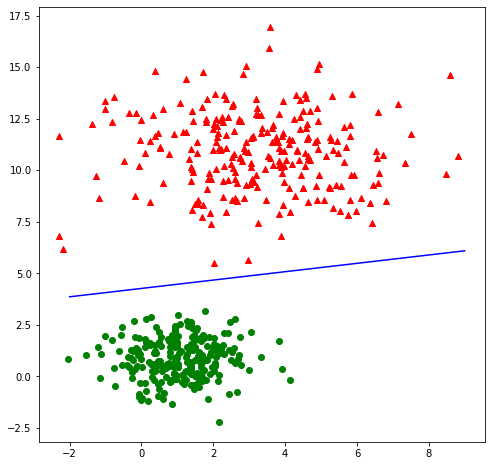

In [473]:
fig = plt.figure(figsize=(8,8))
plt.scatter(psi_1[:,0], psi_1[:,1], c = "green", label=0)
plt.scatter(psi_2[:,0], psi_2[:,1], marker="^", c = "red", label=1)
psi_help = np.array(range(-2,10))
label_help = (-theta_vector[0]-theta_vector[1]*psi_help)/theta_vector[2]
plt.plot(psi_help, label_help, c="blue")
plt.show()

In [474]:
def accuracy(Psi_test, labels_test, psi, theta_vector):
  prediction_res = p_func(theta_vector, Psi_test)
  p = np.array([1 if i>0.5 else 0 for i in prediction_res])
  return np.sum(labels_test==p)/len(Psi_test)

print("Accuracy = ", accuracy(Psi_test, labels_test, psi, theta_vector))

Accuracy =  1.0
